<a href="https://colab.research.google.com/github/machiwao/minimax_algorithm/blob/main/Minimax_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimax Implementation
The following documentation shows the code implementation in Python of the Minimax Algorithm using Trees and lists

In [ ]:
class Tree:
    def __init__(self, children):
        self.children = children

class Terminal(Tree):
    def __init__(self, value):
        # A terminal state is a tree with no children:
        super().__init__([])
        self.value = value

Function Definition of Minimax

In [ ]:
def minimax(tree, maximising_player):
    if isinstance(tree, Terminal):
        return tree.value

    if maximising_player:
        max_value = float("-inf")
        for subtree in tree.children:
            subtree_value = minimax(subtree, not maximising_player)
            max_value = max(subtree_value, max_value)
        return max_value

    else:
        min_value = float("+inf")
        for subtree in tree.children:
            subtree_value = minimax(subtree, not maximising_player)
            min_value = min(subtree_value, min_value)
        return min_value




Populate Tree based on Diagram

In [ ]:
game_tree = Tree([
    Tree([
        Tree([
            Terminal(3),
            Terminal(4),
        ]),
        Tree([
            Terminal(8),
            Tree([
                Terminal(-2),
                Terminal(10),
            ]),
            Terminal(5),
        ])
    ]),
    Terminal(7),
])

Test Run of Algorithm

In [ ]:
print(minimax(game_tree, True))
print(minimax(game_tree, False))

7
5


#Growth Function of Minimax
The following shows the growth function of minimax depending on the branching factor of the tree and depth of the tree.

TypeError: 'float' object cannot be interpreted as an integer

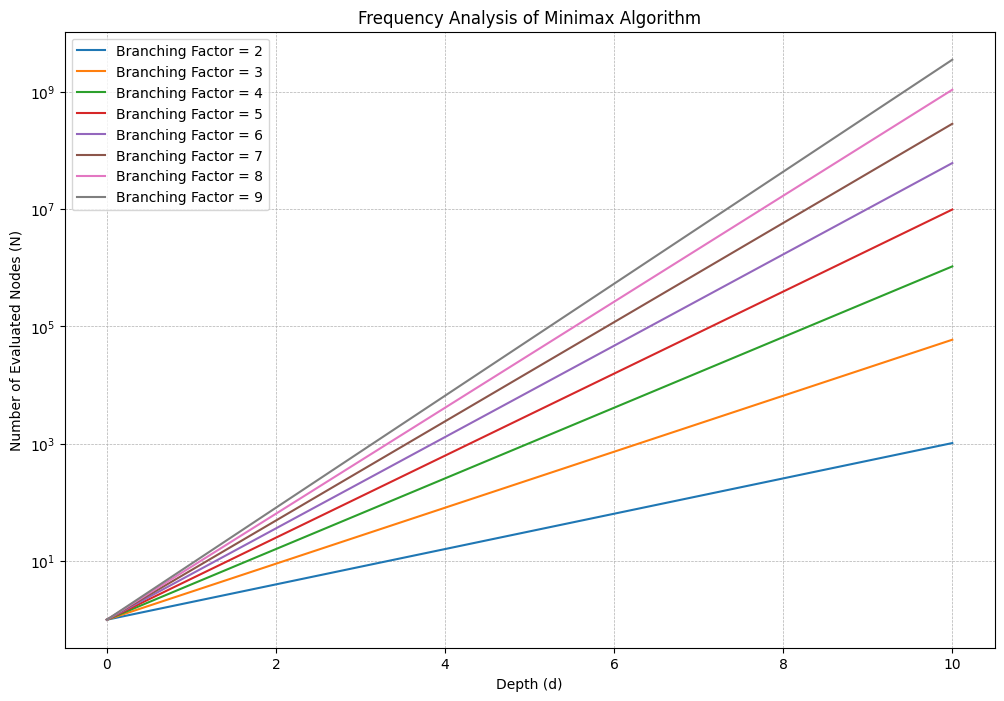

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for the graph
branching_factors = [2, 3, 4, 5, 6, 7, 8, 9]
max_depth = 10

# Generate the depth values
depths = np.arange(0, max_depth + 1)

# Calculate the number of nodes for each branching factor at each depth
node_counts = {b: b ** depths for b in branching_factors}

# Plotting the growth function
plt.figure(figsize=(12, 8))

for b, counts in node_counts.items():
    plt.plot(depths, counts, label=f'Branching Factor = {b}')

plt.yscale('log')
plt.xlabel('Depth (d)')
plt.ylabel('Number of Evaluated Nodes (N)')
plt.title('Frequency Analysis of Minimax Algorithm')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Setting y-axis ticks to increments of 100,000
plt.yticks([10**i for i in range(0, 10)], [f'$10^{i}$' for i in range(0, 10)])
plt.ylim(1, 10**9)  # Set limit for better visualization

plt.show()


The following documentation shows the code implementation in Python of the Minimax Algorithm in Tic-Tac-Toe primarily using Lists

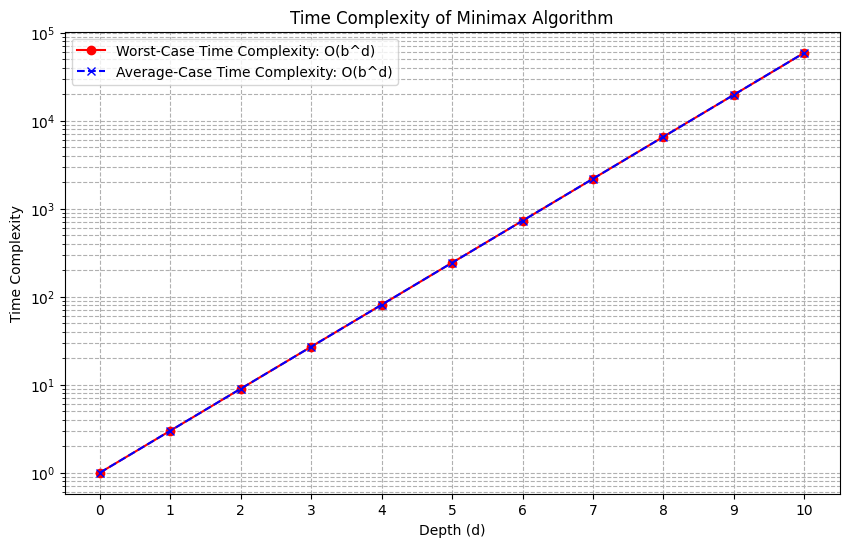

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
branching_factor = 3  # Example branching factor
max_depth = 10  # Maximum depth for the plot

# Depth values
depth = np.arange(0, max_depth + 1)

# Time complexities
worst_case = branching_factor ** depth
average_case = branching_factor ** depth

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(depth, worst_case, label='Worst-Case Time Complexity: O(b^d)', color='r', marker='o')
plt.plot(depth, average_case, label='Average-Case Time Complexity: O(b^d)', color='b', linestyle='--', marker='x')

plt.xlabel('Depth (d)')
plt.ylabel('Time Complexity')
plt.title('Time Complexity of Minimax Algorithm')
plt.legend()
plt.yscale('log')  # Logarithmic scale for better visualization
plt.grid(True, which="both", ls="--")
plt.xticks(depth)
plt.show()


In [ ]:
def minimax(board, depth, is_maximizing):
    winner = check_winner(board)
    if winner is not None:
        return winner_score(winner)

    if is_maximizing:
        best_score = float('-inf')
        for move in get_possible_moves(board):
            board[move] = 'X'
            score = minimax(board, depth + 1, False)
            board[move] = ' '
            best_score = max(score, best_score)
        return best_score

    else:
        best_score = float('inf')
        for move in get_possible_moves(board):
            board[move] = 'O'
            score = minimax(board, depth + 1, True)
            board[move] = ' '
            best_score = min(score, best_score)
        return best_score

def check_winner(board):
    win_conditions = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # Rows
                      (0, 3, 6), (1, 4, 7), (2, 5, 8),  # Columns
                      (0, 4, 8), (2, 4, 6)]            # Diagonals
    for condition in win_conditions:
        if board[condition[0]] == board[condition[1]] == board[condition[2]] and board[condition[0]] != ' ':
            return board[condition[0]]
    if ' ' not in board:
        return 'Tie'
    return None

def winner_score(winner):
    if winner == 'X':
        return 1
    elif winner == 'O':
        return -1
    elif winner == 'Tie':
        return 0

def get_possible_moves(board):
    return [i for i, spot in enumerate(board) if spot == ' ']

def best_move(board):
    best_score = float('-inf')
    move = -1
    for i in get_possible_moves(board):
        board[i] = 'X'
        score = minimax(board, 0, False)
        board[i] = ' '
        if score > best_score:
            best_score = score
            move = i
    return move

def print_board(board):
    for i in range(0, 9, 3):
        print(board[i] + '|' + board[i+1] + '|' + board[i+2])
        if i < 6:
            print('-----')


In [ ]:
def play_tic_tac_toe():
    board = [' ' for _ in range(9)]
    first_move = input("Do you want to play the first move? (y/n): ")
    if first_move == 'y':
      current_player = 'O' # Human starts first
    elif first_move == 'n':
      current_player = 'X'  # AI starts first
    else:
      print("Invalid input. Please enter 'y' or 'n'.")
      return

    while True:
        print_board(board)
        winner = check_winner(board)
        if winner is not None:
            if winner == 'Tie':
                print("It's a tie!")
            else:
                print(f"Player {winner} wins!")
            break

        if current_player == 'O':  # Human move
            move = int(input("Enter your move (0-8): "))
            if board[move] == ' ':
                board[move] = 'O'
                current_player = 'X'
            else:
                print("Invalid move, try again.")
        else:  # AI move
            print("------------------")
            print("AI is thinking...")
            move = best_move(board)
            board[move] = 'X'
            current_player = 'O'

# Run the game
play_tic_tac_toe()


Do you want to play the first move? (y/n): y
 | | 
-----
 | | 
-----
 | | 
Enter your move (0-8): 4
 | | 
-----
 |O| 
-----
 | | 
------------------
AI is thinking...
X| | 
-----
 |O| 
-----
 | | 
Enter your move (0-8): 2
X| |O
-----
 |O| 
-----
 | | 
------------------
AI is thinking...
X| |O
-----
 |O| 
-----
X| | 
Enter your move (0-8): 4
Invalid move, try again.
X| |O
-----
 |O| 
-----
X| | 
Enter your move (0-8): 3
X| |O
-----
O|O| 
-----
X| | 
------------------
AI is thinking...
X| |O
-----
O|O|X
-----
X| | 
Enter your move (0-8): 7
X| |O
-----
O|O|X
-----
X|O| 
------------------
AI is thinking...
X|X|O
-----
O|O|X
-----
X|O| 
Enter your move (0-8): 8
X|X|O
-----
O|O|X
-----
X|O|O
It's a tie!
